# Lz77 Algorithm

### Implementation

This Python code defines a class called Lz77 that implements the LZ77 compression algorithm. The class has three methods:

   - `__init__` method that initializes the buffer length used in the compression algorithm.
   - `__find_longest_match` local method that searches for the longest match of a substring in a buffer given a current position. It returns a tuple containing the offset and length of the longest match found.
   - `encode` method that encodes the given text using the LZ77 compression algorithm. It returns a list of tuples representing the encoded data. Each tuple contains the offset, length, and next character of the match (if any).
   - `decode` method that decodes the encoded text into its original form. It returns the decoded text.

The buffer length used in the LZ77 algorithm can be set by passing a parameter to the Lz77 constructor. The default value is 5.

In [17]:
from typing import List

class Lz77():
    """
    Lz77 class
    """
    def __init__(self, buffer_length = 5) -> None:
        """
        Init method
        """
        self.buffer_length = buffer_length

    def __find_longest_match(self, text: str, current_pos: int):
        """
        This function finds the longest match for a given
        position in a buffer of length buffer_len.
        
        Args:
            tex: str - The text to search for matches.
            current_pos: int - The current position to search for a match.
            buffer_len: int - The length of the buffer to search for matches in.
        
        Returns:
            A tuple containing the offset and length of the longest match found.
        """
        result_offset = 0
        result_length = 0
        for offset in range(1, self.buffer_length+1):
            if current_pos - offset < 0:
                break
            start = current_pos - offset
            end = current_pos
            length = 0
            while (end < len(text) and
                length < offset and
                text[start] == text[end]):
                length += 1
                start += 1
                end += 1
            if length > result_length:
                result_length = length
                result_offset = offset
        return (result_offset, result_length)

    def encode(self, text: str):
        """
        This function encodes the given text using the LZ77 compression algorithm.

        Args:
            text: str - The text to encode.
            buffer_len: int - The length of the buffer used to search for matches.
        
        Returns:
            A list of tuples representing the encoded data. Each tuple contains the offset,
        length, and next character of the match (if any).
        """
        result = []
        pos = 0
        n = len(text)
        while pos < n:
            offset, length = self.__find_longest_match(text, pos)
            if length == 0:
                try:
                    txt = text[pos]
                except IndexError: #if there is no next letter
                    txt = None
                result.append((0, 0, txt))
                pos += 1
            else: #if match length > 0
                try:
                    txt = text[pos + length]
                except IndexError: #if there is no next letter
                    txt = None
                result.append((offset, length, txt))
                pos += 1 + length
        return result

    def decode(self, encoded_text: List[tuple]):
        """
        Lz77 decode method
        """
        result = ""
        for offset, length, letter in encoded_text:
            if length == 0:
                try:
                    result += letter
                except TypeError:
                    continue
            else:
                start = len(result) - offset
                for i in range(length):
                    result += result[start+i]
                try:
                    result += letter
                except TypeError:
                    continue
        return result

### How it is working

In [18]:
#Create an object for Lz77 algorithm with buffer length 5
lz77 = Lz77(5)
#Create simple text line
text = "abarfkoeflepfepkaijdiefjeopqjsndajndjahajhajdahajfhdjeokfeofepp"
#Encode it using lz77 algorithm
encoded = lz77.encode(text)
decoded = lz77.decode(encoded)
#Compare initial text with decoded one
decoded == text

True

### Testing

Create functions for testing compressing

In [19]:
import struct
import sys

def read_data(file) -> str:
    """
    Read data from file function

    Args:
        file: str - Path to input file
    Returns:
        str - read data from file in string format
    """
    with open(file, 'r', encoding='utf-8') as f:
        return "\n".join([i.strip() for i in f.readlines()])

def compress_lz77_to_bytes(lz77_output: List[tuple]):
    """
    Function compresses output of the LZ77 algorithm to bytes and writes it to a file.

    Args:
        lz77_output: list - Output of the LZ77 algorithm, represented as a list of tuples (distance, length, next_char).
        output_file: str - Path to the output file.

    Returns:
        None
    """
    сompressed = bytearray()
    for triple in lz77_output:
        next_char = triple[2] if triple[2] else '\0'
        try:
            packed_triple = struct.pack('<HBB', triple[0], triple[1], ord(next_char))
        except Exception:
            continue
        сompressed += packed_triple
    return сompressed


#### Test compressing small file

In [20]:
obj = Lz77(10)
data = read_data('text_files/middlesize_text.txt')
encoded = obj.encode(data)
compressed = compress_lz77_to_bytes(encoded)
print(f"file: {sys.getsizeof(data)/1000000}mb")
print(f"compressed: {sys.getsizeof(compressed)/1000000}mb")

file: 0.013542mb
compressed: 0.019286mb


In [21]:
obj = Lz77(10)
data = read_data('text_files/big_text.txt')
encoded = obj.encode(data)
compressed = compress_lz77_to_bytes(encoded)
print(f"file: {sys.getsizeof(data)/1000000}mb")
print(f"compressed: {sys.getsizeof(compressed)/1000000}mb")

file: 0.06777mb
compressed: 0.180822mb


In [22]:
obj = Lz77(10)
data = read_data('text_files/verybig.txt')
encoded = obj.encode(data)
compressed = compress_lz77_to_bytes(encoded)
print(f"file: {sys.getsizeof(data)/1000000}mb")
print(f"compressed: {sys.getsizeof(compressed)/1000000}mb")


file: 16.321808mb
compressed: 7.836884mb


In [23]:
#import libraries for testing an algorithm
import matplotlib.pyplot as plt
import time

In [24]:
#List of file pathes which are containing text for testing
file_pathes = ['text_files/small_text.txt', 'text_files/middlesize_text.txt', 'text_files/big_text.txt']

In [25]:
def test_lz77(files: List[str], buffer_size: int):
    time_taken = []
    length = []
    for file_path in files:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = file.read()
        length.append(len(data))
        start = time.time()
        lz77 = Lz77(buffer_size)
        lz77.encode(data)
        end = time.time()
        time_taken.append(end - start)
    plt.xlabel('Text length')
    plt.ylabel('Time taken')
    x = length
    y = time_taken
    plt.plot(x, y)

#### Buffer size = 5

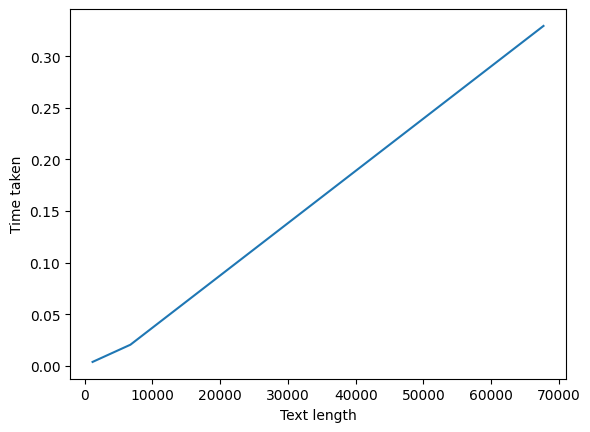

In [26]:
test_lz77(file_pathes, 5)

#### Buffer size = 50

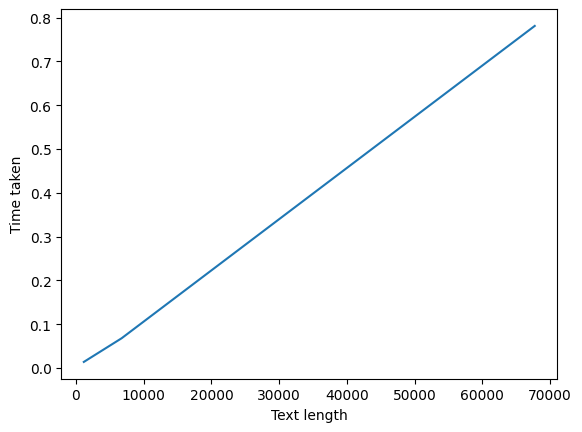

In [27]:
test_lz77(file_pathes, 50)

#### Buffer size = 100

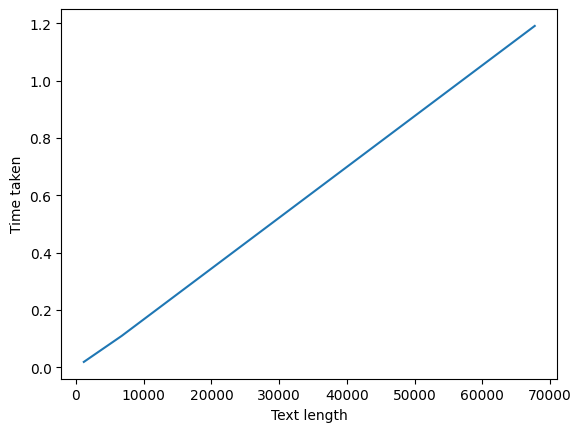

In [28]:
test_lz77(file_pathes, 100)

#### Buffer size = 500

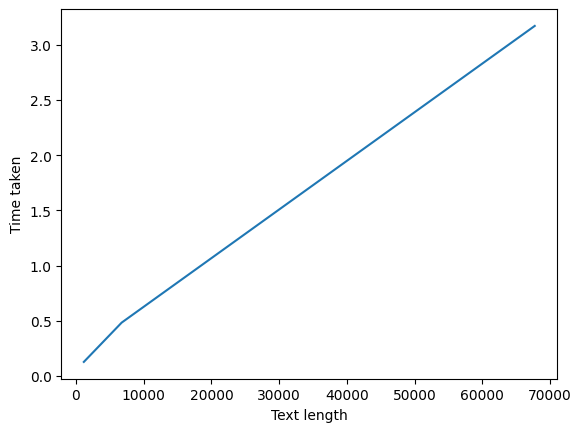

In [29]:
test_lz77(file_pathes, 500)

### Conclusion

LZ77 is commonly used for compressing data in various applications, such as image, video, and audio encoding, as well as in file archiving and transmission. It works by replacing repeated occurrences of data with references to previous occurrences of that data, which can be represented more efficiently.

The algorithm works most effectively with repetitive data, or where there are some regular patterns. It is inefficient to use it to compress already compressed files